In [0]:
import torch
from torch import nn,optim
import torch.nn.functional as F
import torchvision
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [0]:
train_loader = torch.utils.data.DataLoader(
  torchvision.datasets.FashionMNIST('/files/', train=True, download=True,
                             transform=torchvision.transforms.Compose([
                               torchvision.transforms.ToTensor(),
                               torchvision.transforms.Normalize(
                                 (0.1307,), (0.3081,))
                             ])),
  batch_size=64, shuffle=True)

test_loader = torch.utils.data.DataLoader(
  torchvision.datasets.FashionMNIST('/files/', train=False, download=True,
                             transform=torchvision.transforms.Compose([
                               torchvision.transforms.ToTensor(),
                               torchvision.transforms.Normalize(
                                 (0.1307,), (0.3081,))
                             ])),
  batch_size=300, shuffle=True)

64


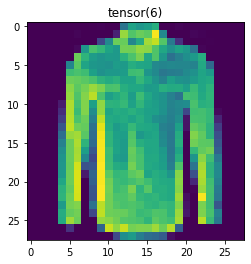

In [0]:
train_examples=enumerate(train_loader)
batch_idx,(train_examples_data,train_examples_targets)=next(train_examples)
train_examples_data1=train_examples_data.view(64,1,784)

number=56
plt.imshow(train_examples_data[number][0])
plt.title(train_examples_targets[number])
print(len(train_examples_targets))

In [0]:
# 0 T-shirt/top
# 1 Trouser
# 2 Pullover
# 3 Dress
# 4 Coat
# 5 Sandal
# 6 Shirt
# 7 Sneaker
# 8 Bag
# 9 Ankle boot

In [0]:
class Everything1(nn.Module):
  def __init__(self):
    super(Everything1, self).__init__()
    self.hidden1=nn.Linear(784,512)
    self.hidden2=nn.Linear(512,256)
    self.hidden3=nn.Linear(256,64)
    self.output=nn.Linear(64,10)
  def forward(self,x):
    x=F.relu(self.hidden1(x))
    x=F.relu(self.hidden2(x))
    x=F.relu(self.hidden3(x))
    x=F.log_softmax(self.output(x),dim=1)
    #x=self.output(x)
    return x
class Everything2(nn.Module):
  def __init__(self):
    super(Everything2, self).__init__()
    self.hidden1=nn.Linear(784,512)
    self.hidden2=nn.Linear(512,256)
    self.hidden3=nn.Linear(256,64)
    self.output=nn.Linear(64,10)
    self.dropout=nn.Dropout(p=0.2)
  def forward(self,x):
    x=self.dropout(F.relu(self.hidden1(x)))
    x=self.dropout(F.relu(self.hidden2(x)))
    x=self.dropout(F.relu(self.hidden3(x)))
    x=F.log_softmax(self.output(x),dim=1)
    #x=self.output(x)
    return x

In [0]:
model1=Everything1()
model2=Everything2()

In [0]:
epochs=30
optimizer=optim.SGD(model1.parameters(),lr=0.04)
criterion=nn.NLLLoss()
loss_at_epoch_training=np.array([])
loss_at_epoch_testing=np.array([])
for i in range(epochs):
  training_loss=0
  testing_loss=0
  for images,labels in train_loader:

    train_examples_data1=images.view(images.shape[0],784)
    optimizer.zero_grad()

    logProbs=model1(train_examples_data1)

    loss=criterion(logProbs,labels)

    training_loss+=loss

    loss.backward()
    
    optimizer.step()
  with torch.no_grad():
    for images,labels in test_loader:
      test_examples_data2=images.view(images.shape[0],784)

      logProbs=model1(test_examples_data2)
        
      loss=criterion(logProbs,labels)

      testing_loss+=loss
  training_loss=training_loss/len(train_loader)
  testing_loss=testing_loss/len(test_loader)
  print("training_loss",training_loss)
  print("testing_loss",testing_loss)
  loss_at_epoch_training=np.append(loss_at_epoch_training,training_loss.detach().numpy())
  loss_at_epoch_testing=np.append(loss_at_epoch_testing,testing_loss.numpy())

training_loss tensor(0.6856, grad_fn=<DivBackward0>)
testing_loss tensor(0.5266)
training_loss tensor(0.4099, grad_fn=<DivBackward0>)
testing_loss tensor(0.4165)
training_loss tensor(0.3609, grad_fn=<DivBackward0>)
testing_loss tensor(0.3841)
training_loss tensor(0.3296, grad_fn=<DivBackward0>)
testing_loss tensor(0.3837)
training_loss tensor(0.3071, grad_fn=<DivBackward0>)
testing_loss tensor(0.3818)
training_loss tensor(0.2885, grad_fn=<DivBackward0>)
testing_loss tensor(0.3716)
training_loss tensor(0.2741, grad_fn=<DivBackward0>)
testing_loss tensor(0.3518)
training_loss tensor(0.2590, grad_fn=<DivBackward0>)
testing_loss tensor(0.3502)
training_loss tensor(0.2468, grad_fn=<DivBackward0>)
testing_loss tensor(0.3715)
training_loss tensor(0.2359, grad_fn=<DivBackward0>)
testing_loss tensor(0.3706)
training_loss tensor(0.2266, grad_fn=<DivBackward0>)
testing_loss tensor(0.3327)
training_loss tensor(0.2157, grad_fn=<DivBackward0>)
testing_loss tensor(0.3483)
training_loss tensor(0.2064,

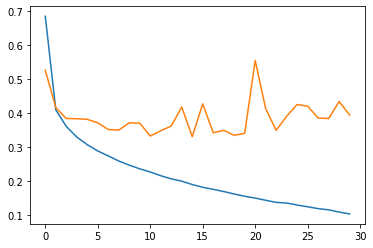

In [0]:
plt.plot(loss_at_epoch_training, label="training")
plt.plot(loss_at_epoch_testing, label="testing")
plt.show()

In [0]:
epochs=30
optimizer=optim.SGD(model2.parameters(),lr=0.04)
criterion=nn.NLLLoss()
loss_at_epoch_training=np.array([])
loss_at_epoch_testing=np.array([])
for i in range(epochs):
  training_loss=0
  testing_loss=0
  for images,labels in train_loader:

    train_examples_data1=images.view(images.shape[0],784)
    optimizer.zero_grad()

    logProbs=model2(train_examples_data1)

    loss=criterion(logProbs,labels)

    training_loss+=loss

    loss.backward()
    
    optimizer.step()
  with torch.no_grad():
    model.eval()
    for images,labels in test_loader:
      test_examples_data2=images.view(images.shape[0],784)

      logProbs=model2(test_examples_data2)
        
      loss=criterion(logProbs,labels)

      testing_loss+=loss
  model.train()
  training_loss=training_loss/len(train_loader)
  testing_loss=testing_loss/len(test_loader)
  print("training_loss",training_loss)
  print("testing_loss",testing_loss)
  loss_at_epoch_training=np.append(loss_at_epoch_training,training_loss.detach().numpy())
  loss_at_epoch_testing=np.append(loss_at_epoch_testing,testing_loss.numpy())

training_loss tensor(0.1800, grad_fn=<DivBackward0>)
testing_loss tensor(0.3800)
training_loss tensor(0.1776, grad_fn=<DivBackward0>)
testing_loss tensor(0.3722)
training_loss tensor(0.1729, grad_fn=<DivBackward0>)
testing_loss tensor(0.3741)
training_loss tensor(0.1701, grad_fn=<DivBackward0>)
testing_loss tensor(0.3644)
training_loss tensor(0.1698, grad_fn=<DivBackward0>)
testing_loss tensor(0.3693)
training_loss tensor(0.1644, grad_fn=<DivBackward0>)
testing_loss tensor(0.3738)
training_loss tensor(0.1640, grad_fn=<DivBackward0>)
testing_loss tensor(0.3817)
training_loss tensor(0.1593, grad_fn=<DivBackward0>)
testing_loss tensor(0.3792)
training_loss tensor(0.1562, grad_fn=<DivBackward0>)
testing_loss tensor(0.3732)
training_loss tensor(0.1551, grad_fn=<DivBackward0>)
testing_loss tensor(0.3888)
training_loss tensor(0.1517, grad_fn=<DivBackward0>)
testing_loss tensor(0.4193)
training_loss tensor(0.1496, grad_fn=<DivBackward0>)
testing_loss tensor(0.3870)
training_loss tensor(0.1471,

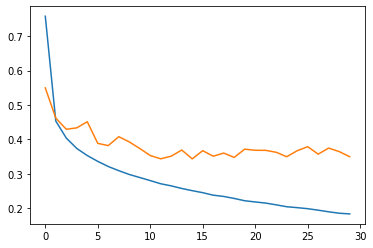

In [0]:
plt.plot(loss_at_epoch_training, label="training")
plt.plot(loss_at_epoch_testing, label="testing")
plt.show()

In [0]:
def PrintProbOutput(data):
  data=data.detach().numpy()
  x=torch.Tensor(range(0,10))
  print (data)
  print (x)
  #plt.bar(x.view(1,10),Probs)
  #sns.distplot(a=Probs,hist=True)
  plt.scatter(x.view(1,10),data)
  plt.ylim(0,1)
  plt.show

Text(0.5, 1.0, 'tensor(8)')

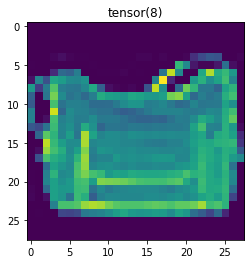

In [0]:
number=294
plt.imshow(test_examples_data[number][0])
plt.title(test_examples_targets[number])

[[5.8558687e-08 1.4222527e-14 6.5427559e-12 5.7408391e-13 1.0281373e-10
  5.9905697e-10 4.3772641e-10 1.7250134e-11 1.0000000e+00 9.7641227e-12]]
tensor([0., 1., 2., 3., 4., 5., 6., 7., 8., 9.])


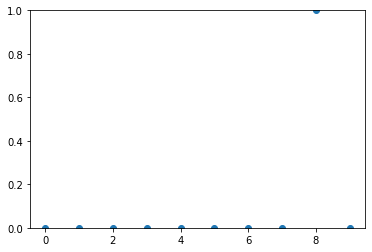

In [0]:
with torch.no_grad():
  output=model(test_examples_data1[number])
  output=torch.exp(output)
PrintProbOutput(output)

In [0]:
def CalculatedOutput(output):
  output=output.numpy()
  highest=-1
  rank=-1
  for i in range(len(output)):
    if output[i]>highest:
      highest=output[i]
      rank=i
  return np.array([rank])
def Accuracy(calc,exp):
  calc_output=np.array([])
  for i in range(300):
    calc_output=np.append(calc_output,CalculatedOutput(calc[i]))
  exp_output=exp.numpy() #Converts into an numpy array
  accuracy=100*(np.sum(calc_output==exp_output)/300)
  return accuracy

In [0]:
batch,(images,labels)=next(enumerate(test_loader))
images=images.view(images.shape[0],784)
with torch.no_grad():
  output1=model1(images)
  output1=torch.exp(output1)
  output2=model2(images)
  output2=torch.exp(output2)
print("Accuracy of model1 (without dropout)",Accuracy(output1,labels))
print("Accuracy of model2 (with dropout)",Accuracy(output2,labels))

Accuracy of model1 (without dropout) 92.0
Accuracy of model2 (with dropout) 90.0
